In [1]:
import numpy as np
import pandas as pd

distinct_features = ["By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"]

def load_data(filename):
    with open(filename) as f:
        data = pd.read_json(f)

    dist = data.features.apply(
        lambda x: pd.Series(map(lambda z: 1 if (z in x) else 0, distinct_features) +
                            [list(np.setdiff1d(x, distinct_features))]))
    dist.columns = distinct_features + ["UNIQUES"]

    data = data.join(dist)

    man_counts = pd.DataFrame(data.manager_id.value_counts())
    man_counts["manager count"] = man_counts["manager_id"]
    man_counts["manager_id"] = man_counts.index

    data = pd.merge(data, man_counts, on="manager_id")

    return data


train_data = load_data("train.json")

In [62]:
train_data.columns

Index([            u'bathrooms',              u'bedrooms',
                 u'building_id',               u'created',
                 u'description',       u'display_address',
                    u'features',        u'interest_level',
                    u'latitude',            u'listing_id',
                   u'longitude',            u'manager_id',
                      u'photos',                 u'price',
              u'street_address',              u'By Owner',
                   u'Exclusive',  u'Sublet / Lease-Break',
                      u'No Fee',           u'Reduced Fee',
          u'Short Term Allowed',             u'Furnished',
             u'Laundry In Unit', u'Private Outdoor Space',
               u'Parking Space',          u'Cats Allowed',
                u'Dogs Allowed',               u'Doorman',
                    u'Elevator',        u'Fitness Center',
         u'Laundry In Building',  u'Common Outdoor Space',
            u'Storage Facility',               u'UNIQUES

In [ ]:
#Get the count for each interest level
TotalCount = train_data.groupby('interest_level').size()

In [84]:
NoFee = train_data[train_data['No Fee']==1].groupby('interest_level').size()
Elevator = train_data[train_data['Elevator']==1].groupby('interest_level').size()
Doorman = train_data[train_data['Doorman']==1].groupby('interest_level').size()
LaundryInUnit = train_data[train_data['Laundry In Unit']==1].groupby('interest_level').size()
LaundryInBuilding = train_data[train_data['Laundry In Building']==1].groupby('interest_level').size()
FitnessCenter = train_data[train_data['Fitness Center']==1].groupby('interest_level').size()
ReducedFee = train_data[train_data['Reduced Fee']==1].groupby('interest_level').size()
CommonOutdoorSpace = train_data[train_data['Common Outdoor Space']==1].groupby('interest_level').size()
Exclusive = train_data[train_data['Exclusive']==1].groupby('interest_level').size()
PrivateOutdoorSpace = train_data[train_data['Private Outdoor Space']==1].groupby('interest_level').size()
DogsAllowed = train_data[train_data['Dogs Allowed']==1].groupby('interest_level').size()
CatsAllowed = train_data[train_data['Cats Allowed']==1].groupby('interest_level').size()
Furnished = train_data[train_data['Furnished']==1].groupby('interest_level').size()
ShortTermAllowed = train_data[train_data['Short Term Allowed']==1].groupby('interest_level').size()
CommonOutdoorSpace = train_data[train_data['Common Outdoor Space']==1].groupby('interest_level').size()
SubletBreak = train_data[train_data['Common Outdoor Space']==1].groupby('interest_level').size()

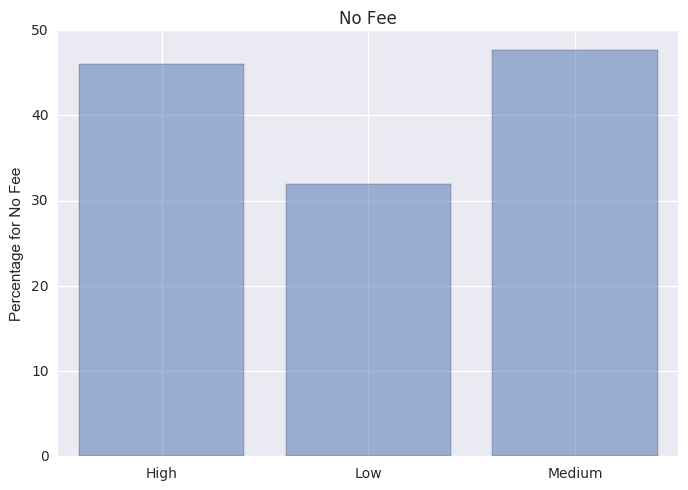

In [53]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), NoFee/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for No Fee')
plt.title('No Fee')
plt.show()

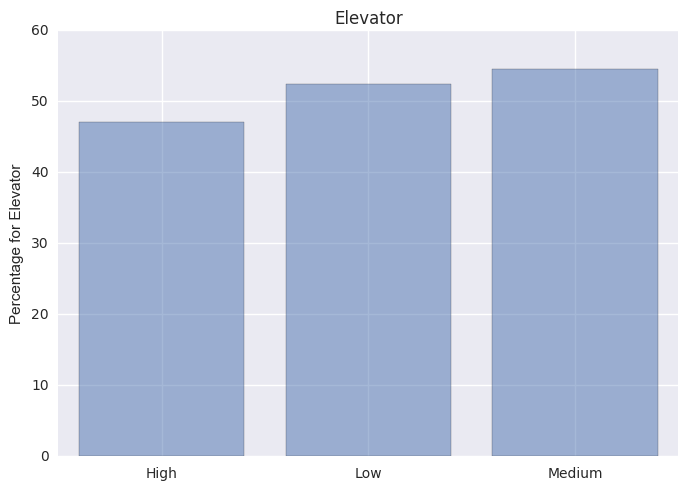

In [54]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), Elevator/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Elevator')
plt.title('Elevator')
plt.show()

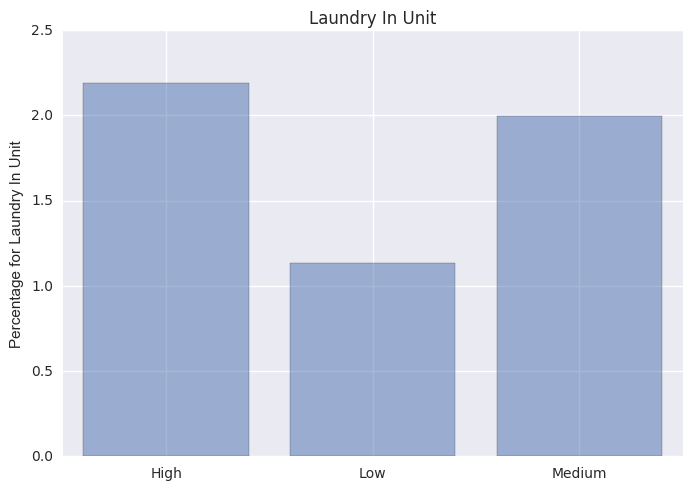

In [58]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), LaundryInUnit/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Laundry In Unit')
plt.title('Laundry In Unit')
plt.show()

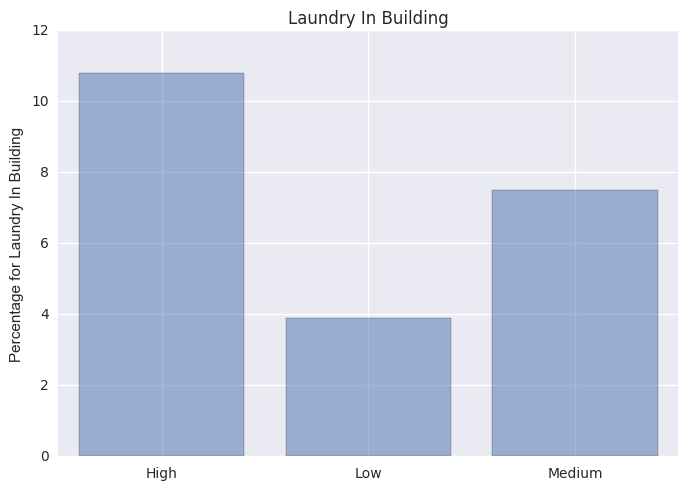

In [64]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), LaundryInBuilding/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Laundry In Building')
plt.title('Laundry In Building')
plt.show()

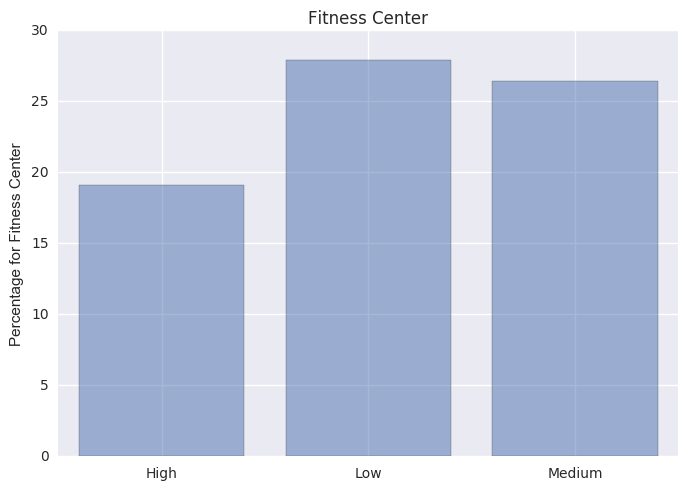

In [66]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), FitnessCenter/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Fitness Center')
plt.title('Fitness Center')
plt.show()

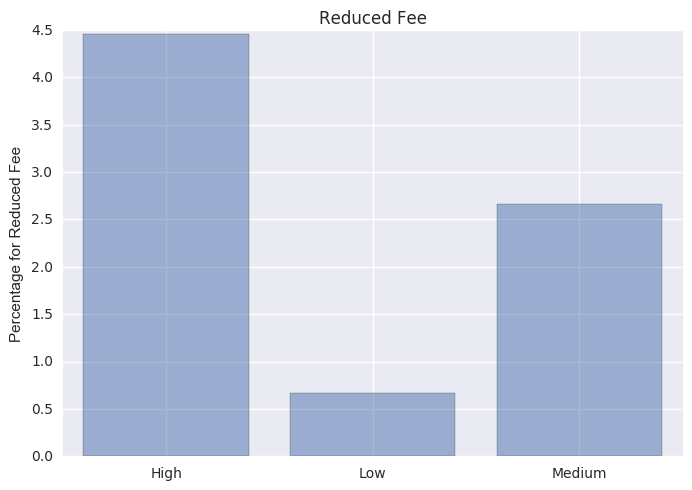

In [68]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), ReducedFee/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Reduced Fee')
plt.title('Reduced Fee')
plt.show()

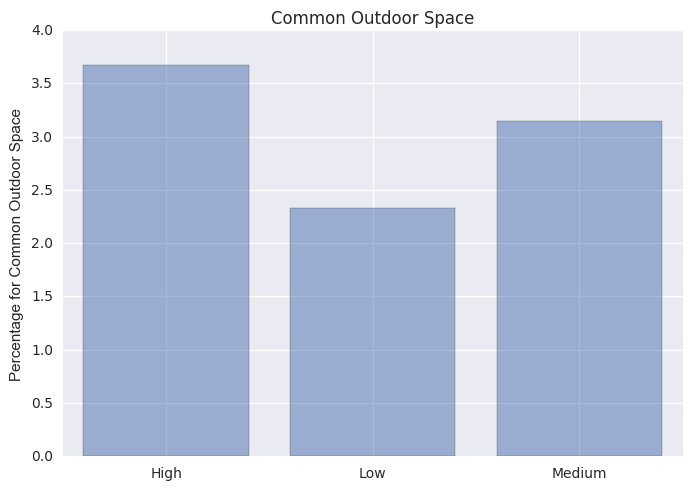

In [71]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), CommonOutdoorSpace/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Common Outdoor Space')
plt.title('Common Outdoor Space')
plt.show()

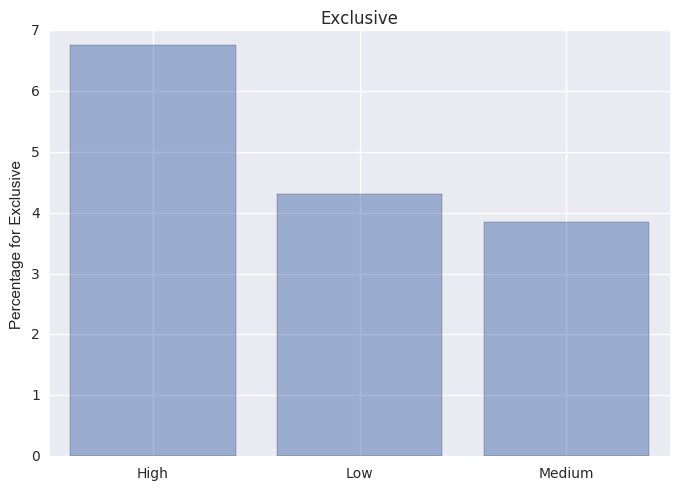

In [73]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), Exclusive/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Exclusive')
plt.title('Exclusive')
plt.show()

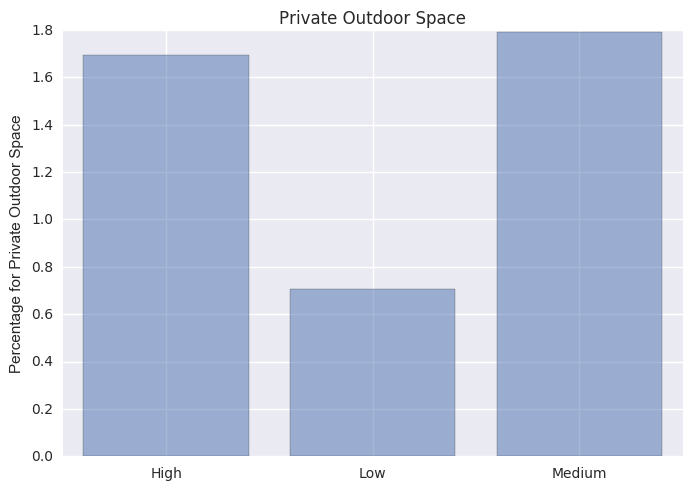

In [75]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), PrivateOutdoorSpace/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Private Outdoor Space')
plt.title('Private Outdoor Space')
plt.show()

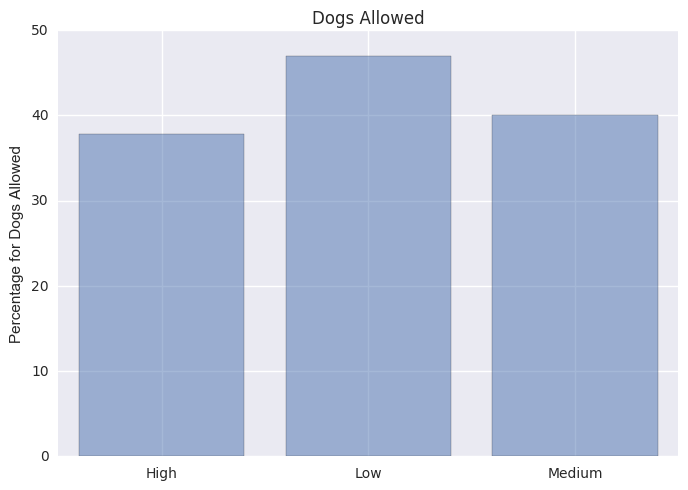

In [77]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), DogsAllowed/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Dogs Allowed')
plt.title('Dogs Allowed')
plt.show()

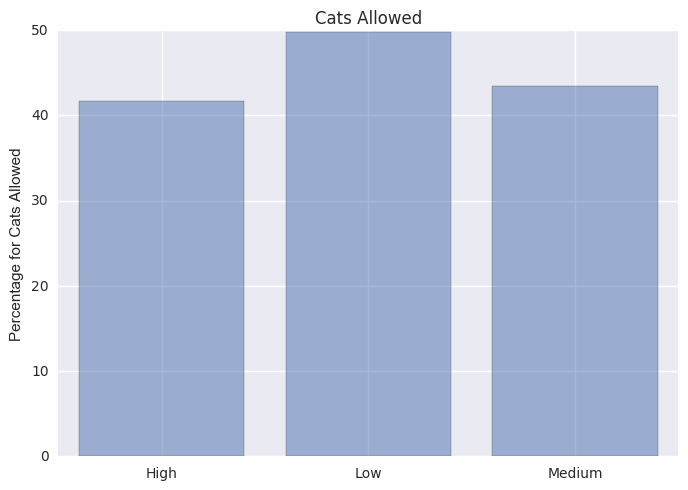

In [79]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), CatsAllowed/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Cats Allowed')
plt.title('Cats Allowed')
plt.show()

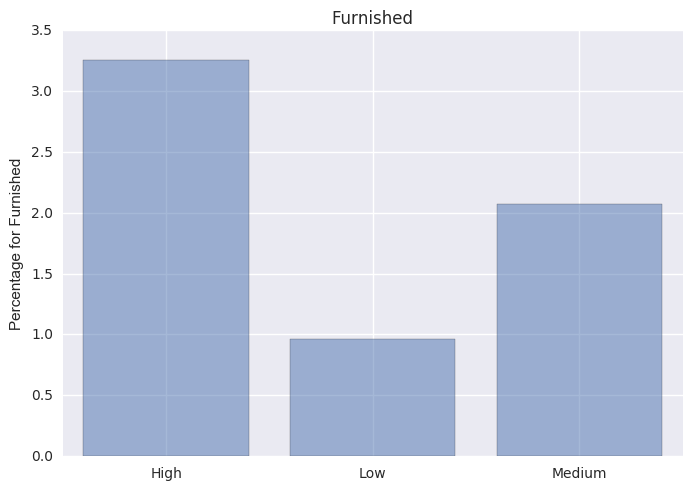

In [81]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), Furnished/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Furnished')
plt.title('Furnished')
plt.show()

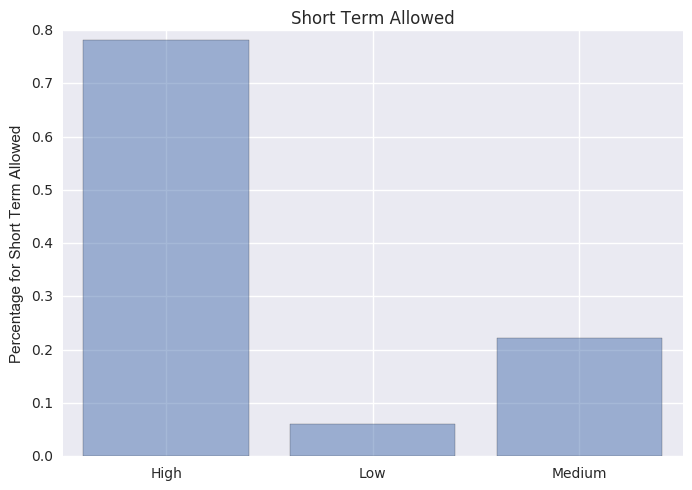

In [83]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), ShortTermAllowed/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Short Term Allowed')
plt.title('Short Term Allowed')
plt.show()

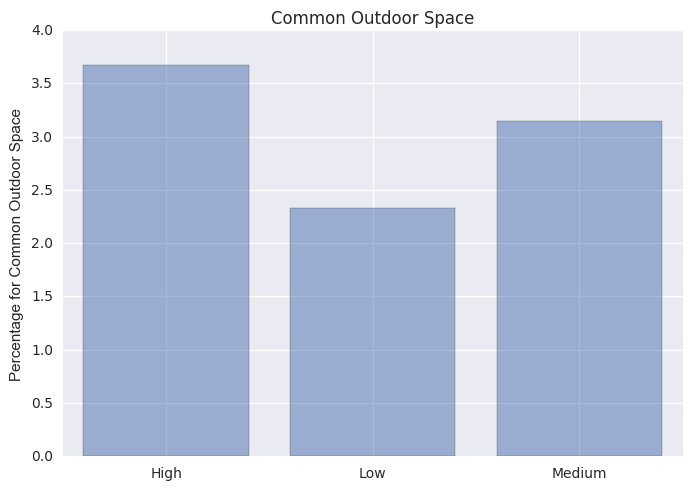

In [85]:
import matplotlib.pyplot as plt
import seaborn
objects = ('High','Low','Medium')
plt.bar(np.arange(3), CommonOutdoorSpace/TotalCount*100, align='center', alpha=0.5)
plt.xticks(np.arange(3), objects)
plt.ylabel('Percentage for Common Outdoor Space')
plt.title('Common Outdoor Space')
plt.show()